### Problema de Clusterización

Como me sobra un poco de tiempo, voy a probar a hacer un experimento he intentar enfocar el problema de negocio, como si fuer aun problema de clusterización. 
Mi objetivo es intentar agrupar a los pacientes en función de sus síntomas en un máximo de 10-15 grupos. Aunque lo ideal sería poder clasificarlos en menos. Como soy conciente que en medicina, no todo es blanco o negro y que hay matices, de ahí que aumente a 15 los grupos.

In [60]:
# Empiezo importando las librerias

import numpy as np
import pandas as pd

In [61]:
# Cargamos el dataset

df = pd.read_csv('/Users/lauragarcia/Projects/ML_Lung_Cancer_Prediction/src/data_sample/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [64]:
# Buscando valores nulos
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [65]:
# Aparentemente no hay nulos y los datos están ya estandarizados, salvo la edad
# Voy a buscar información por si hubiera escalas a las que hace referencia esta standarización.
# Tras buscar datos de todas las varibles, no existe una ctegorización como tal de las mismas. De hecho la mayoría se categorizan como leve, moderada severa.
# Sólamente en riesgos laborales he encontrado una categorización en 7 riesgos, pero no creo que tenga mucho sentido, ya que son el tipo de riesgo y no una calificación de poco a mucho rriesgo que parece que es la tendecncia del resto de variables.
# En cuanto a la obesidad. Existen 4 grados junto al sobrepeso, si le añadimos las otras dos categorizaciones que hace la OMS, que son normopeso y bajo peso, tendríamos las 7. En este caso el 1 seria bajo peso y el 7 obesidad extrema.
# en cuanto al género, no he encontrado ninguna información, pero por otros datasets e informaciones leidas parece que 1 es mujer y 2 es hombre.


In [66]:
# Antes de nada voy a eiminar las columnas que no me sirven para nada como el index o el pacient Id

df.drop('index', axis= 1, inplace= True)
df.drop('Patient Id', axis= 1, inplace= True )
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [67]:
# Y voy a codificar el Level a numérica para no tener poblemas con la clusterizacion.

df['Level']= df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [68]:
# Con la información preliminar que tenemos todas las variables son de tipo int. Además estan estandarizadas. 

In [69]:
# En este caso mi problema de negocio es un problema de agrupamiento de pacientes en por sus características clínicas
# Es por tanto un problema de clustering y lo enfocaré como no jerárquico.


In [70]:
# En los clasos de clusterización como no tenemos target, tampoco tendríamos que hacer ninguna división en train, ni en test. Por lo tanto, empezamos directamente con el problema, ya que el MiniEda ya estaría hecho.

In [71]:
# Para el caso del DBSCAN y el KMean que se basan en distancias si que tengo que scalar los datos, puesto que es un modelo sensible a la escala.

In [72]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_standard_scaled = standard_scaler.fit_transform(df)
print("Standard Scaled:", df_standard_scaled)

Standard Scaled: [[-0.34784816 -0.81990292 -0.90667901 ... -0.41855027  0.72865507
  -1.30313517]
 [-1.68123833 -0.81990292 -0.41391868 ...  1.54417079 -0.6282445
  -0.07607757]
 [-0.18117439 -0.81990292  0.07884165 ...  1.54417079 -0.6282445
   1.15098003]
 ...
 [-1.01454325  1.21965659  0.07884165 ...  1.54417079 -0.6282445
   1.15098003]
 [-1.59790145  1.21965659  1.06436231 ... -0.90923053  0.05020528
   1.15098003]
 [ 0.81886824 -0.81990292  1.06436231 ...  1.54417079 -0.6282445
   1.15098003]]


In [73]:
# Como tenemos muchas features y muchos datos en general, voy a de primeras a reducirla con un PCA

In [74]:
# Para que no haya mucho problema con la dimensionalidad voy a hacer un PCA

from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(df_standard_scaled)

pca.n_components_

np.int64(20)

In [75]:
pd.DataFrame(X_train_pca, columns= [f"feat_new_{i}" for i in range(1,pca.n_components_+1)])

,feat_new_1,feat_new_2,feat_new_3,feat_new_4,feat_new_5,feat_new_6,feat_new_7,feat_new_8,feat_new_9,feat_new_10,feat_new_11,feat_new_12,feat_new_13,feat_new_14,feat_new_15,feat_new_16,feat_new_17,feat_new_18,feat_new_19,feat_new_20
0,-2.802218,-0.700578,0.039642,-0.302028,0.227759,0.730849,-0.954314,1.127177,0.416074,0.104995,-0.541621,0.189441,-0.820095,-0.490243,0.689547,0.316071,-0.461887,-0.365053,-0.850047,0.133614
1,-2.409919,1.134361,0.510434,1.871494,0.062398,-0.962341,-2.778938,-1.078123,-1.199601,0.845527,-0.267086,0.149493,-0.839443,-0.109126,-0.434038,-1.056666,-0.999708,-0.091434,0.747404,-0.094689
2,2.003856,2.933359,0.352453,-2.537657,-1.148588,0.738826,-1.251555,0.498956,-0.111785,-0.559738,0.033277,-0.174501,0.072686,-0.115441,-0.211446,-0.020637,-0.024186,-0.340967,0.104492,0.033814
3,4.098245,-1.224774,0.939409,-1.736162,1.624395,-0.661307,-0.116098,-0.477218,1.050734,-0.402740,-0.063509,0.729231,-0.116302,-0.304853,-0.131110,0.268645,0.149779,0.098400,-0.044649,0.069517
4,3.749505,-2.621025,-0.344979,-1.007893,-0.015459,0.663217,0.073911,-0.212491,0.434126,-0.435270,-0.887728,-0.738198,-0.528739,0.158674,0.150405,0.161118,0.014101,-0.021739,0.244860,-0.078779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.891530,-1.568112,1.496630,1.461828,0.255765,0.552663,-0.223684,-1.080422,-0.469216,0.237963,-0.764295,0.518079,0.751860,-0.318805,-0.100433,-0.079718,-0.412899,-0.210841,-0.217594,-0.118989
996,4.200940,-0.290904,0.323006,0.997393,-1.508556,0.283303,1.352072,1.632721,0.074198,1.653646,0.905718,-0.772535,0.828366,-0.065391,0.231880,-0.156273,-0.034164,0.161181,-0.161580,-0.067225
997,1.818070,2.997945,0.389792,-2.537659,-2.281006,-0.728431,-0.332911,0.509055,0.073138,-0.102709,0.255569,0.131764,-0.055598,-0.012580,-0.040358,-0.230046,-0.154829,-0.257803,-0.034988,0.058541
998,3.521582,-2.579037,-0.154178,-0.791507,-1.519862,-1.786669,0.207078,0.148621,1.073651,-0.110806,-0.391954,-0.477805,-0.636289,0.250711,0.434689,-0.116006,-0.123792,-0.028458,0.102039,-0.039623


In [ ]:
# Como se ve hemos reducido nuestras columnas a 20 de 26 que teníamos

In [77]:
# Ahora vamos a intentar hacer un agrupamiento con KMeans, recordamos que aquí le tengo yo que poner el número K, para no elegirlo al azar, voy a generar un rango y luego ya vemos cual es el más apropiado.

from sklearn.cluster import KMeans

k_range = range(5, 151, 5)
kmeans_per_k = []

for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans) 

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150


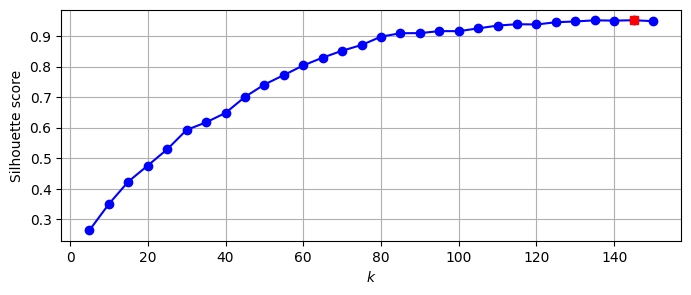

In [78]:
# Lo pintamos gráficamente con el método de la silueta

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index] # Esto para pintarlo 
best_score = silhouette_scores[best_index] # equivalente a max(silhouette_scores)

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [79]:
best_k

145

In [ ]:
# Obtenemos un best_K de 145

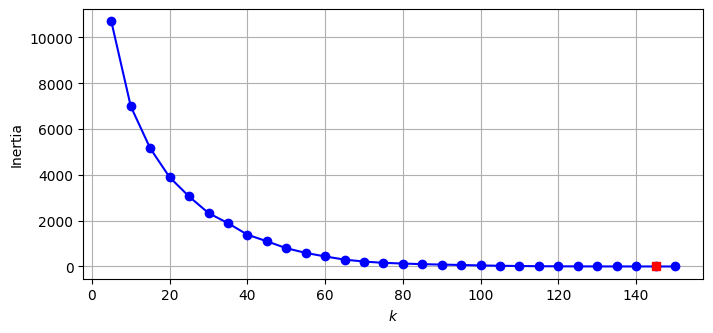

In [80]:
# Voy a probar con el métdo del codo

inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [ ]:
# Sale clavado 145

In [82]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=145, n_init=10, random_state=42)

In [83]:
# esaria bien poder verlo gráficamente


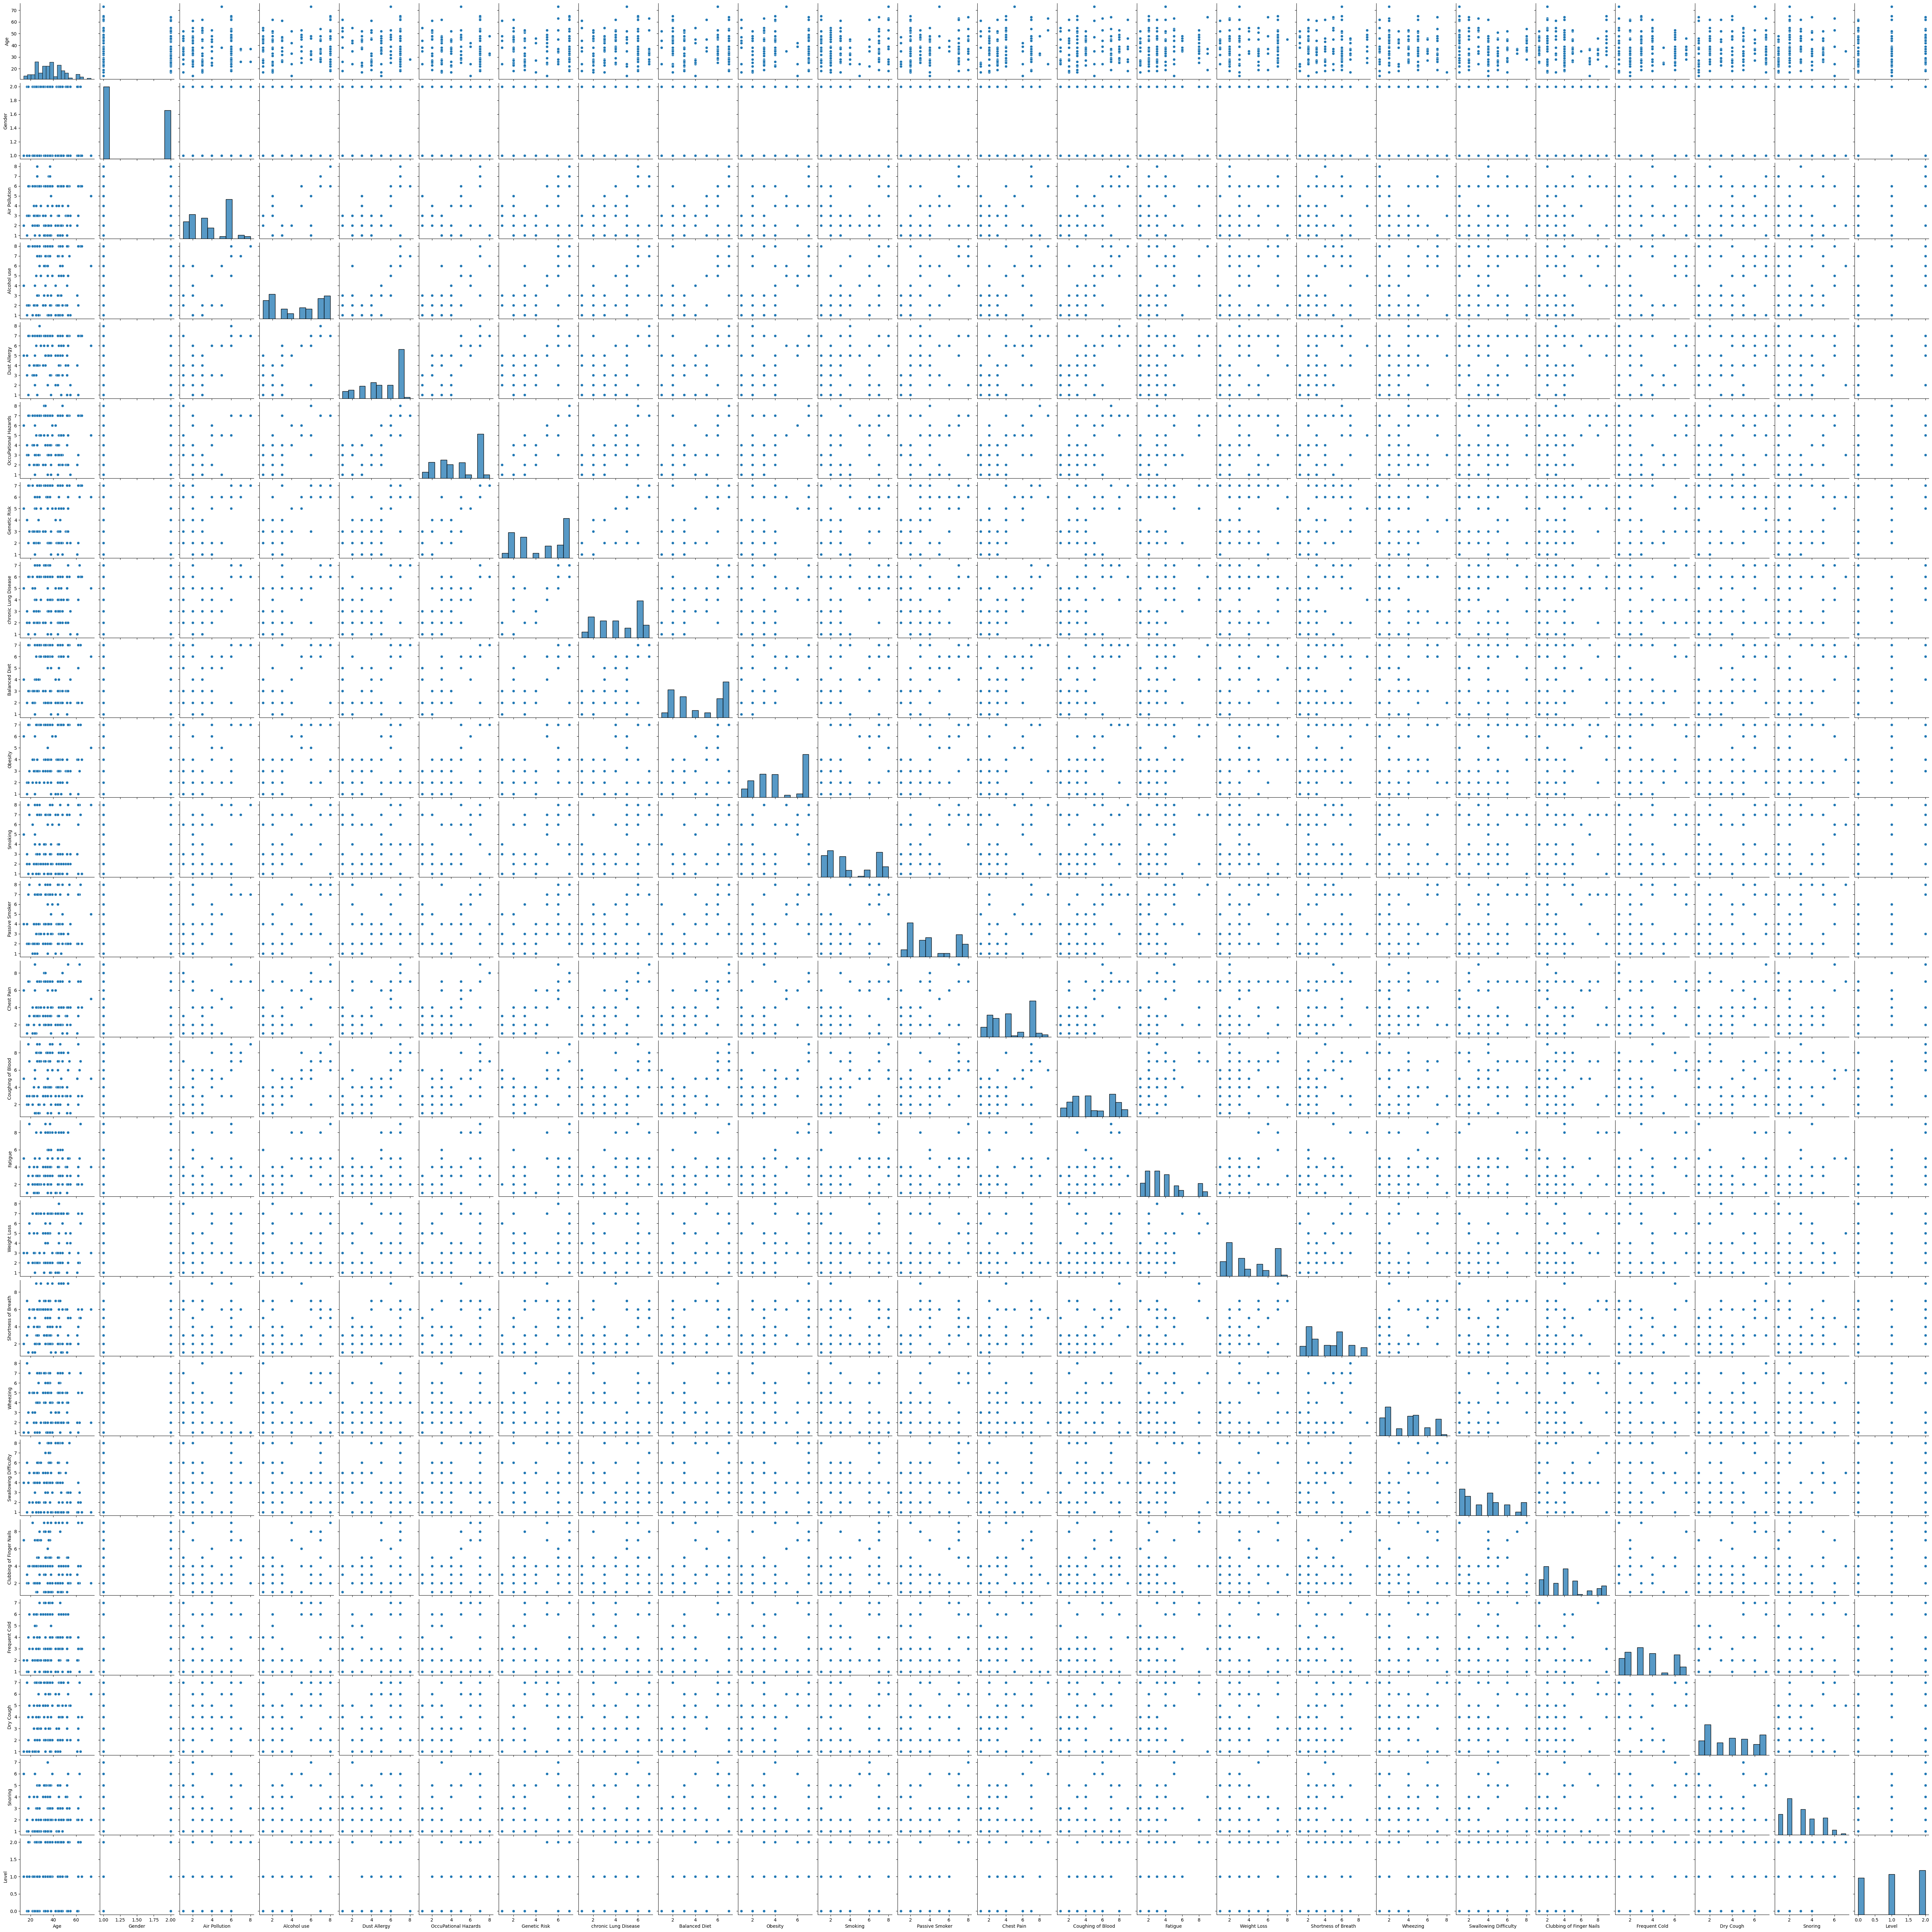

In [84]:
# Ahora lo voy a hacer con DBSCAN

# Voy a hacer un pairplot para ver si hay 2 varibles que puedan estar muy relacionadas y de esa manera poder reducir la dimensionalidad

import seaborn as sns

sns.pairplot(df)

In [85]:
# Aparentemente, salvo la edad y el género, casi todas las combinaciones por parejas, podrían ser agrupadas de alguna manera


In [86]:
# Voy a hacer un DBSCAN

from sklearn.cluster import DBSCAN

outlier_percent = []
experiments = {}

for min_samples in [3,5,10,15,20]:
    print(f"Min_samples = {min_samples}")
    outlier_percent = []
    for eps in np.linspace(0.001,6,100): # Genera 100 valores equidistantes entre 0.001 y 6
        
        # Creamos el modelo
        dbscan = DBSCAN(eps=eps, min_samples=min_samples) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
        dbscan.fit(df_standard_scaled)
        # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        #if perc_outliers <= 10:
        #    print(perc_outliers, dbscan.labels_)
        #    print(len(dbscan.labels_))
        #    print(pd.Series(dbscan.labels_).value_counts())
        outlier_percent.append(perc_outliers)
    experiments[min_samples] = outlier_percent.copy()

Min_samples = 3
Min_samples = 5
Min_samples = 10
Min_samples = 15
Min_samples = 20


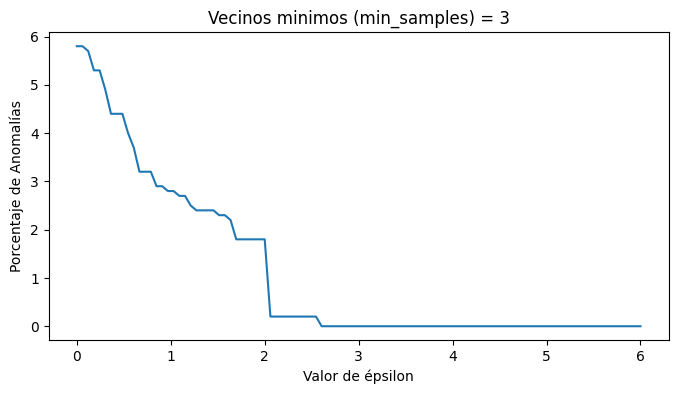

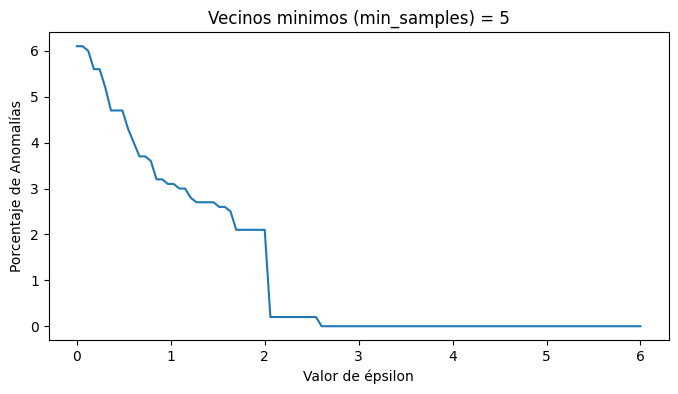

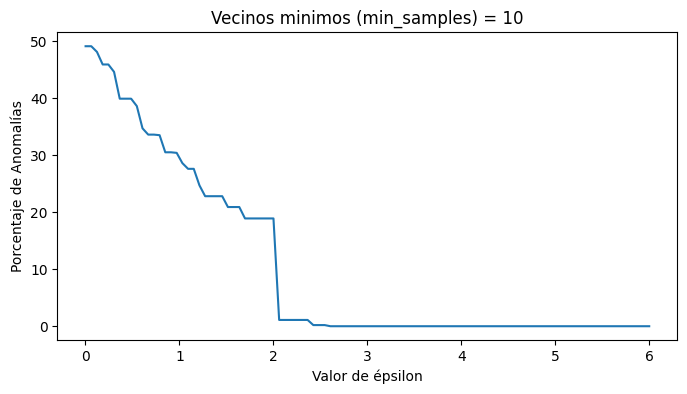

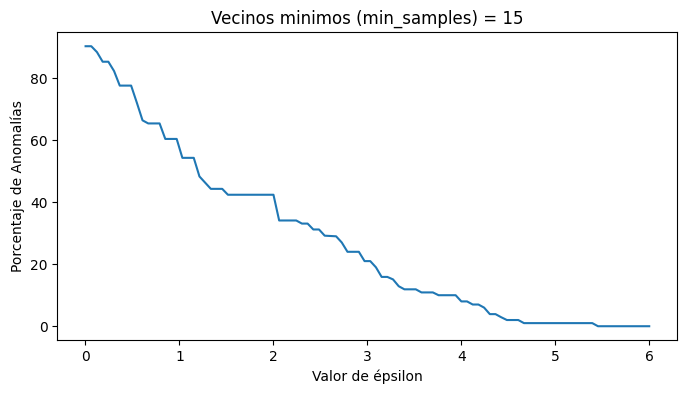

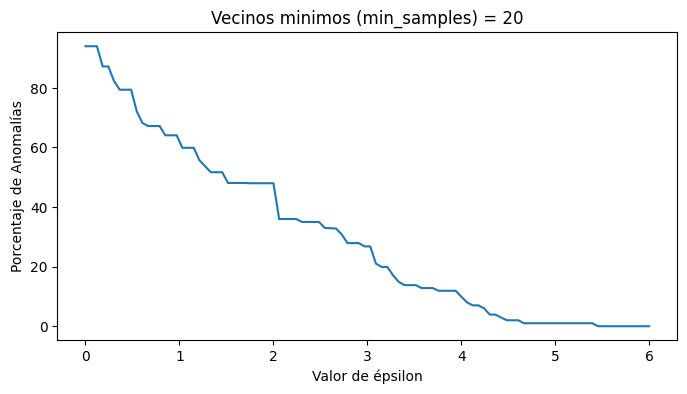

In [87]:
for min_samples in [3,5,10,15,20]:
    #Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
    plt.figure(figsize = (8,4), dpi = 100)
    sns.lineplot(x=np.linspace(0.001,6,100), y=experiments[min_samples])
    plt.ylabel("Porcentaje de Anomalías")
    plt.xlabel("Valor de épsilon")
    plt.title(f"Vecinos minimos (min_samples) = {min_samples}")
    plt.show()

In [ ]:
# Aparentemente, todos entre 2 y 3 podríamos situar la eps que nos reduce las anomalías a menos de un 10%. en el caso de 3 y 5. Para más de 10 vecinos, el porcentaje de anomalías ya es muy alto. Comprobemos:

In [95]:
for min_samples in [3,5]:
    print(f"Para num_samples = {min_samples}:")
    for indice, valor in enumerate(np.linspace(0.001,6,100)):
        if 0 <= valor <= 3:
            print(f"{valor} -> {experiments[min_samples][indice]}")

Para num_samples = 3:
0.001 -> 5.8
0.06159595959595959 -> 5.8
0.12219191919191918 -> 5.7
0.18278787878787878 -> 5.3
0.24338383838383837 -> 5.3
0.30397979797979796 -> 4.9
0.36457575757575755 -> 4.4
0.42517171717171715 -> 4.4
0.48576767676767674 -> 4.4
0.5463636363636363 -> 4.0
0.6069595959595959 -> 3.7
0.6675555555555556 -> 3.2
0.7281515151515151 -> 3.2
0.7887474747474746 -> 3.2
0.8493434343434343 -> 2.9
0.9099393939393939 -> 2.9
0.9705353535353535 -> 2.8
1.031131313131313 -> 2.8
1.0917272727272724 -> 2.7
1.1523232323232322 -> 2.7
1.2129191919191917 -> 2.5
1.2735151515151513 -> 2.4
1.334111111111111 -> 2.4
1.3947070707070706 -> 2.4
1.45530303030303 -> 2.4
1.5158989898989896 -> 2.3
1.5764949494949492 -> 2.3
1.637090909090909 -> 2.2
1.6976868686868685 -> 1.8
1.758282828282828 -> 1.8
1.8188787878787878 -> 1.8
1.8794747474747473 -> 1.8
1.9400707070707068 -> 1.8
2.0006666666666666 -> 1.8
2.061262626262626 -> 0.2
2.1218585858585857 -> 0.2
2.182454545454545 -> 0.2
2.2430505050505047 -> 0.2
2.3

In [96]:
# Parece que podemos situal el epsilon en 2.5 en ambos casos, Vooy a comprobar cuantos cluster se formarian.

for min_samples in [3,5]:
    dbscan = DBSCAN(eps = 2.5, min_samples = min_samples)
    dbscan.fit(df_standard_scaled)
    print(f"Para {min_samples} de vecinos: {pd.Series(dbscan.labels_[dbscan.labels_ != -1]).nunique()} clusters")

Para 3 de vecinos: 48 clusters
Para 5 de vecinos: 48 clusters


In [ ]:
# Obtendríamos 48 cluster. Son muchos? Según mis preferencias sí


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [99]:

# voy a probar con las features obtenidas por PCA

pca.n_components_



np.int64(20)

In [100]:
pd.DataFrame(X_train_pca, columns= [f"feat_new_{i}" for i in range(1,pca.n_components_+1)])

,feat_new_1,feat_new_2,feat_new_3,feat_new_4,feat_new_5,feat_new_6,feat_new_7,feat_new_8,feat_new_9,feat_new_10,feat_new_11,feat_new_12,feat_new_13,feat_new_14,feat_new_15,feat_new_16,feat_new_17,feat_new_18,feat_new_19,feat_new_20
0,-2.802218,-0.700578,0.039642,-0.302028,0.227759,0.730849,-0.954314,1.127177,0.416074,0.104995,-0.541621,0.189441,-0.820095,-0.490243,0.689547,0.316071,-0.461887,-0.365053,-0.850047,0.133614
1,-2.409919,1.134361,0.510434,1.871494,0.062398,-0.962341,-2.778938,-1.078123,-1.199601,0.845527,-0.267086,0.149493,-0.839443,-0.109126,-0.434038,-1.056666,-0.999708,-0.091434,0.747404,-0.094689
2,2.003856,2.933359,0.352453,-2.537657,-1.148588,0.738826,-1.251555,0.498956,-0.111785,-0.559738,0.033277,-0.174501,0.072686,-0.115441,-0.211446,-0.020637,-0.024186,-0.340967,0.104492,0.033814
3,4.098245,-1.224774,0.939409,-1.736162,1.624395,-0.661307,-0.116098,-0.477218,1.050734,-0.402740,-0.063509,0.729231,-0.116302,-0.304853,-0.131110,0.268645,0.149779,0.098400,-0.044649,0.069517
4,3.749505,-2.621025,-0.344979,-1.007893,-0.015459,0.663217,0.073911,-0.212491,0.434126,-0.435270,-0.887728,-0.738198,-0.528739,0.158674,0.150405,0.161118,0.014101,-0.021739,0.244860,-0.078779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.891530,-1.568112,1.496630,1.461828,0.255765,0.552663,-0.223684,-1.080422,-0.469216,0.237963,-0.764295,0.518079,0.751860,-0.318805,-0.100433,-0.079718,-0.412899,-0.210841,-0.217594,-0.118989
996,4.200940,-0.290904,0.323006,0.997393,-1.508556,0.283303,1.352072,1.632721,0.074198,1.653646,0.905718,-0.772535,0.828366,-0.065391,0.231880,-0.156273,-0.034164,0.161181,-0.161580,-0.067225
997,1.818070,2.997945,0.389792,-2.537659,-2.281006,-0.728431,-0.332911,0.509055,0.073138,-0.102709,0.255569,0.131764,-0.055598,-0.012580,-0.040358,-0.230046,-0.154829,-0.257803,-0.034988,0.058541
998,3.521582,-2.579037,-0.154178,-0.791507,-1.519862,-1.786669,0.207078,0.148621,1.073651,-0.110806,-0.391954,-0.477805,-0.636289,0.250711,0.434689,-0.116006,-0.123792,-0.028458,0.102039,-0.039623


In [101]:
outlier_percent = []
experiments = {}

for min_samples in [3,5,10,15,20]:
    print(f"Min_samples = {min_samples}")
    outlier_percent = []
    for eps in np.linspace(0.001,6,100): # Genera 100 valores equidistantes entre 0.001 y 6
        
        # Creamos el modelo
        dbscan = DBSCAN(eps=eps, min_samples=min_samples) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
        dbscan.fit(X_train_pca)
        # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        #if perc_outliers <= 10:
        #    print(perc_outliers, dbscan.labels_)
        #    print(len(dbscan.labels_))
        #    print(pd.Series(dbscan.labels_).value_counts())
        outlier_percent.append(perc_outliers)
    experiments[min_samples] = outlier_percent.copy()

Min_samples = 3
Min_samples = 5
Min_samples = 10
Min_samples = 15
Min_samples = 20


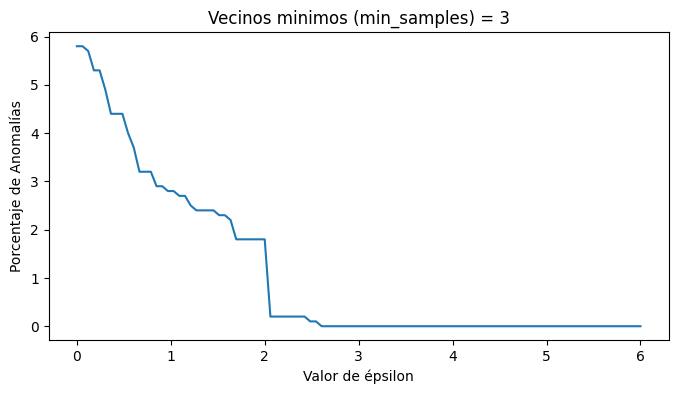

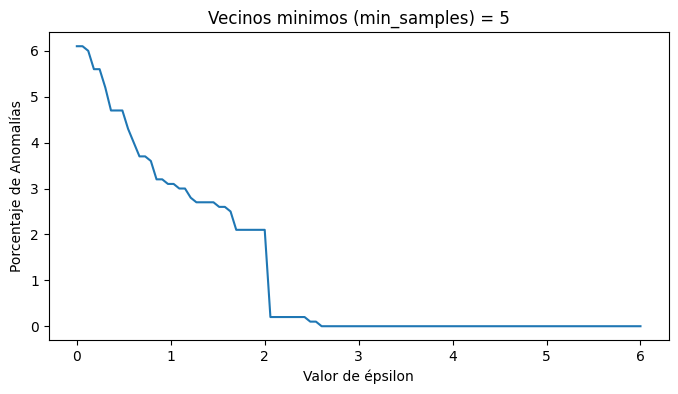

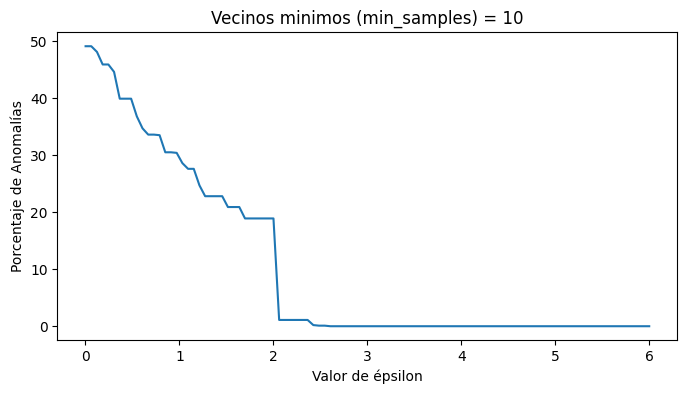

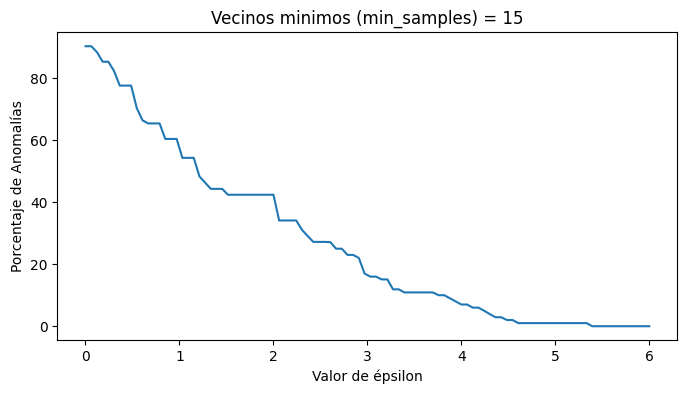

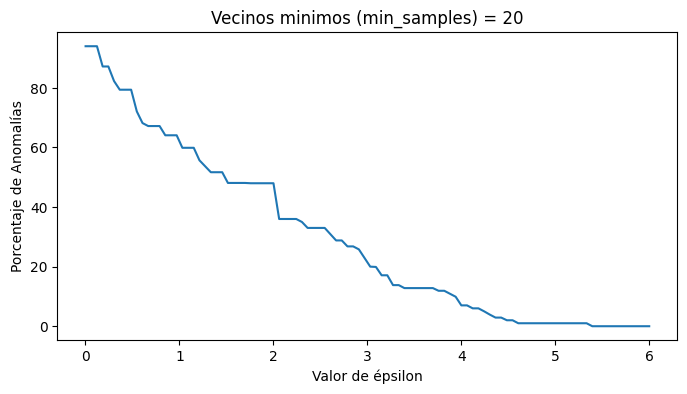

In [102]:
for min_samples in [3,5,10,15,20]:
    #Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
    plt.figure(figsize = (8,4), dpi = 100)
    sns.lineplot(x=np.linspace(0.001,6,100), y=experiments[min_samples])
    plt.ylabel("Porcentaje de Anomalías")
    plt.xlabel("Valor de épsilon")
    plt.title(f"Vecinos minimos (min_samples) = {min_samples}")
    plt.show()

In [ ]:
# es similar a lo acontecido anteriormente, con 10 vecinos se nos dispara el porcentaje de anomalias

In [103]:
# Aún así voy a ver cuantos clustetr me divide
for min_samples in [3,5]:
    print(f"Para num_samples = {min_samples}:")
    for indice, valor in enumerate(np.linspace(0.001,6,100)):
        if 1 <= valor <= 2:
            print(f"{valor} -> {experiments[min_samples][indice]}")

Para num_samples = 3:
1.031131313131313 -> 2.8
1.0917272727272724 -> 2.7
1.1523232323232322 -> 2.7
1.2129191919191917 -> 2.5
1.2735151515151513 -> 2.4
1.334111111111111 -> 2.4
1.3947070707070706 -> 2.4
1.45530303030303 -> 2.4
1.5158989898989896 -> 2.3
1.5764949494949492 -> 2.3
1.637090909090909 -> 2.2
1.6976868686868685 -> 1.8
1.758282828282828 -> 1.8
1.8188787878787878 -> 1.8
1.8794747474747473 -> 1.8
1.9400707070707068 -> 1.8
Para num_samples = 5:
1.031131313131313 -> 3.1
1.0917272727272724 -> 3.0
1.1523232323232322 -> 3.0
1.2129191919191917 -> 2.8
1.2735151515151513 -> 2.7
1.334111111111111 -> 2.7
1.3947070707070706 -> 2.7
1.45530303030303 -> 2.7
1.5158989898989896 -> 2.6
1.5764949494949492 -> 2.6
1.637090909090909 -> 2.5
1.6976868686868685 -> 2.1
1.758282828282828 -> 2.1
1.8188787878787878 -> 2.1
1.8794747474747473 -> 2.1
1.9400707070707068 -> 2.1


In [104]:
# Parece que podemos situal el epsilon en 2.5 en ambos casos, Voy a comprobar cuantos cluster se formarian.

for min_samples in [3,5]:
    dbscan = DBSCAN(eps = 2.5, min_samples = min_samples)
    dbscan.fit(X_train_pca)
    print(f"Para {min_samples} de vecinos: {pd.Series(dbscan.labels_[dbscan.labels_ != -1]).nunique()} clusters")

Para 3 de vecinos: 46 clusters
Para 5 de vecinos: 46 clusters


In [ ]:
# Parece que al estar tan sinteticos los datos, los resultados son idénticos, y sinceramente no me parece que 42 clusters, sera una buena manera de agrupar a los pacientes. 

In [ ]:
# Por lo tanto aquí queda mi experimento.